<a href="https://colab.research.google.com/github/Wanita-8943/efficientnet_keras_transfer_learning/blob/master/Predict2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [10]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [11]:
df = pd.read_csv (r'/content/drive/My Drive/cut_panoramic/All_file_complete1.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Filename,Path_filename,Sex,Floder
0,1.0,1,7,Y7F,V1.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
1,2.0,1,7,Y7F,Flip_V1.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
2,3.0,2,7,Y7F,V2.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
3,4.0,2,7,Y7F,Flip_V2.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
4,5.0,3,7,Y7F,V3.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
...,...,...,...,...,...,...,...,...
5472,215.0,50,25,Y25M,J146.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
5473,216.0,51,25,Y25M,J166.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
5474,217.0,52,25,Y25M,J169.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
5475,218.0,53,25,Y25M,J183.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt


In [18]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Flimpano1.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [19]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Flimpano1.h5')
height = width = model.input_shape[1]

In [21]:
base_dir = '/content/drive/My Drive/Trian_Validation_Test'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [23]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2144 images belonging to 36 classes.
{0: 'Y10F', 1: 'Y10M', 2: 'Y11F', 3: 'Y11M', 4: 'Y12F', 5: 'Y12M', 6: 'Y13F', 7: 'Y13M', 8: 'Y15F', 9: 'Y15M', 10: 'Y16F', 11: 'Y16M', 12: 'Y17F', 13: 'Y17M', 14: 'Y18F', 15: 'Y18M', 16: 'Y19F', 17: 'Y19M', 18: 'Y20F', 19: 'Y20M', 20: 'Y21F', 21: 'Y21M', 22: 'Y22F', 23: 'Y22M', 24: 'Y23F', 25: 'Y23M', 26: 'Y24F', 27: 'Y24M', 28: 'Y25F', 29: 'Y25M', 30: 'Y7F', 31: 'Y7M', 32: 'Y8F', 33: 'Y8M', 34: 'Y9F', 35: 'Y9M'}


In [24]:
test = df[df['Fig_Person_Sex'].between(37,40)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Filename,Path_filename,Sex,Floder
72,73.0,37,7,Y7F,V51.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
73,74.0,37,7,Y7F,Flip_V51.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
74,75.0,38,7,Y7F,V52.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
75,76.0,38,7,Y7F,Flip_V52.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
76,77.0,39,7,Y7F,V53.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
...,...,...,...,...,...,...,...,...
5337,80.0,40,25,Y25F,Flip_J192.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศหญิง,Both
5459,202.0,37,25,Y25M,Flip_J267.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Lt
5460,203.0,38,25,Y25M,Flip_J355.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Lt
5461,204.0,39,25,Y25M,Flip_J379.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Lt


In [25]:
act = test['Class'].tolist()
path = test['Path_filename'].tolist()

In [27]:
# act

In [37]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape) 
    x /= 255.
    result = model.predict([x])
    return result[0]

In [38]:
# predict_image(path[0])

In [31]:
no = np.argmax(predict_image(path[0]))
labels[no]

1/1 [==============================] - 0s 66ms/step


'Y7F'

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

In [47]:
prob_list[0]

0.4704898

In [41]:
# data_train = valframe
# #เช็คคลาสใน Predicted
# pred_class = set(data_train['category_ov'])
# print('Predicted : ',len(pred_class))
# print(pred_class)
# print('-'*50)
# #เช็คคลาสใน Actual
# classe = set(data_train['class'])
# print('Actual : ',len(classe))
# print(classe)

In [44]:
pred = np.array(pred_list)
act = np.array(act)

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 9.056603773584905%
              precision    recall  f1-score   support

        Y10F       0.20      0.12      0.15         8
        Y10M       0.11      0.14      0.12         7
        Y11F       0.11      0.62      0.18         8
        Y11M       0.00      0.00      0.00         7
        Y12F       0.00      0.00      0.00         7
        Y12M       0.07      0.50      0.12         6
        Y13F       0.00      0.00      0.00         8
        Y13M       0.00      0.00      0.00         8
        Y15F       0.07      0.12      0.09         8
        Y15M       0.00      0.00      0.00         8
        Y16F       0.00      0.00      0.00         8
        Y16M       0.00      0.00      0.00         7
        Y17F       0.00      0.00      0.00         5
        Y17M       0.00      0.00      0.00         7
        Y18F       0.00      0.00      0.00         8
        Y18M       0.00      0.00      0.00         6
        Y19F       0.00      0.00      0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 21.5, 'Predicted label')

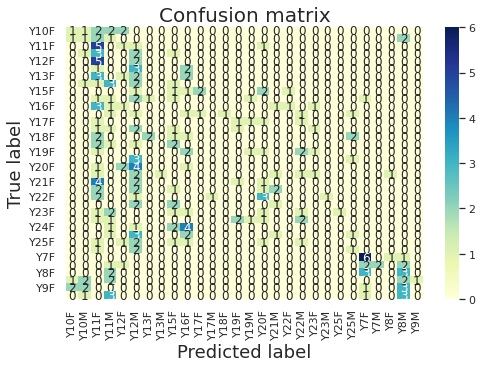

In [46]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)